### １． ロジスティック回帰、サポートベクトルマシン、決定木などの頑健な分類アルゴリズム

### ２． 線形及び非線形の決定境界を持つ分類機の長所と短所

#### 本章の対象外

#### モデルの前処理、モデルの調整・評価

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [5]:
from sklearn.model_selection import train_test_split

# 各クラス数を均一にするために内部でシャッフル
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)  # 特徴量ごとにパラメータを推定（平均と標準偏差）
# print(sc.mean_)
X_train_std = sc.transform(X_train)  # 訓練データを標準化
X_test_std = sc.transform(X_test)

In [11]:
# X_train_std = sc.fit_transform(X_train)

In [13]:
from sklearn.linear_model import Perceptron
# エポック数４０？
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [75]:
ppn.coef_

array([[-0.10655204, -0.11836728],
       [ 0.31790327, -0.3670884 ],
       [ 0.36018414,  0.30003858]])

In [76]:
ppn.intercept_

array([-1.00000000e-01, -2.77555756e-17, -4.00000000e-01])

In [18]:
y_pred = ppn.predict(X_test_std)
print(f'number of y_test: {len(y_test)}')
print('Misclassified examples: %d' % (y_test != y_pred).sum())

number of y_test: 45
Misclassified examples: 1


In [78]:
ppn_001 = Perceptron(eta0=0.01, random_state=1)
ppn_001.fit(X_train_std, y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
y_pred001 = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred001).sum())

Misclassified examples: 1


In [19]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
# 1/45 = 0.22

Accuracy: 0.978


In [49]:

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    print(xx1.shape, xx2.shape, Z.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')

(258, 265) (258, 265) (258, 265)


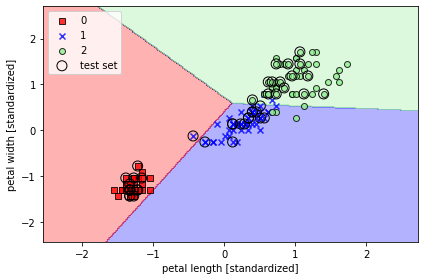

In [50]:

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()


[[25 16  9  4  1  0  1  4  9 16 25]
 [25 16  9  4  1  0  1  4  9 16 25]
 [25 16  9  4  1  0  1  4  9 16 25]
 [25 16  9  4  1  0  1  4  9 16 25]
 [25 16  9  4  1  0  1  4  9 16 25]
 [25 16  9  4  1  0  1  4  9 16 25]
 [25 16  9  4  1  0  1  4  9 16 25]
 [25 16  9  4  1  0  1  4  9 16 25]
 [25 16  9  4  1  0  1  4  9 16 25]
 [25 16  9  4  1  0  1  4  9 16 25]
 [25 16  9  4  1  0  1  4  9 16 25]]
[[25 25 25 25 25 25 25 25 25 25 25]
 [16 16 16 16 16 16 16 16 16 16 16]
 [ 9  9  9  9  9  9  9  9  9  9  9]
 [ 4  4  4  4  4  4  4  4  4  4  4]
 [ 1  1  1  1  1  1  1  1  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1  1]
 [ 4  4  4  4  4  4  4  4  4  4  4]
 [ 9  9  9  9  9  9  9  9  9  9  9]
 [16 16 16 16 16 16 16 16 16 16 16]
 [25 25 25 25 25 25 25 25 25 25 25]]
[[  0  -9 -16 -21 -24 -25 -24 -21 -16  -9   0]
 [  9   0  -7 -12 -15 -16 -15 -12  -7   0   9]
 [ 16   7   0  -5  -8  -9  -8  -5   0   7  16]
 [ 21  12   5   0  -3  -4  -3   0   5  12  21]
 [ 24  15   8   3 

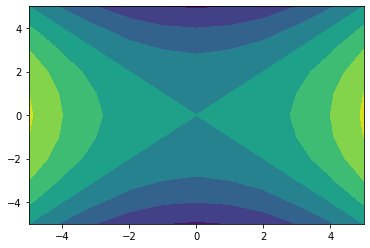

In [74]:
# import numpy as np　　#Numpyのインポート
# import matplotlib.pyplot as plt　　#matplotlib.pyplotをインポート
#①格子点の座標を用意
x = np.arange(-5, 6)
y = np.arange(-5, 6) #上と同じ
X, Y = np.meshgrid(x, y) #格子点座標の作成
print(X**2)
print(Y**2)
#②各点ごとの値を用意
data = X**2 - Y**2 #格子点ごとのデータを作成
print(data)
#③等高線を描画
plt.contourf(x, y, data) #等高線をプロット
plt.show()#画像の表示

### ロジスティック回帰

#### オッズ比
$$\frac{p}{1-p}$$

##### 事象の起こりやすさ、ｐは正事象の確率


#### ロジット関数
$$logit(\mathbf{p}) = \ln(\frac{p}{1-p})$$

$$\exp(y) = \frac{p}{1-p}$$

$$\exp(y) - exp(y){p} = {p}$$

$$p = \frac{exp(y)}{exp(y) + 1} = \frac{1}{1 + exp(-y)}$$

#### ※シグモイド関数（ロジット関数の逆関数）



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


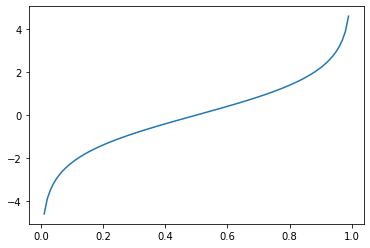

In [93]:

def logit(p):
    return np.log(p / (1-p))

p = np.linspace(0, 1, 100)

y = logit(p)
plt.plot(p, y)


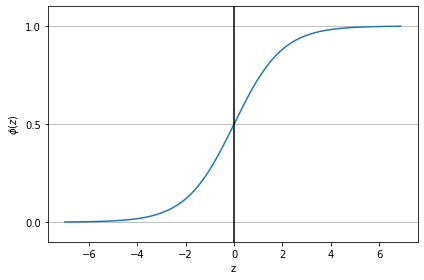

In [97]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

### 二値分類の場合
$$
    % ローマン体にする
    \hat{y} =
        \begin{cases}
            1 \quad \phi(z) \geqq 0.5 \\
            0 \quad \phi(z) < 0.5 \\
        \end{cases}
$$

* 仮説：
    * 出力ラベル$y=1$の確率の推定モデル：$$p(x;w)=\sigma(w_0+w_1x_1+\cdots+w_dx_d), \text{ $\phi(z)$はsigmoid関数とする。}$$
    * 確率の推定値が0.5より大きければ$f(x;w)=1$, 小さければ$f(x;w)=0$と予測する。
* 損失関数：交差エントロピー損失
\begin{eqnarray*}
L(w)=\begin{cases}
-\log(p(x;w))\text{ if }y = 1\\
-\log(1-p(x;w))\text{ if }y=0
\end{cases}
\end{eqnarray*}

学習時には、各データポイントに対して交差エントロピー損失を計算し、その平均値が最も小さくなるような1次式を予測器として求める

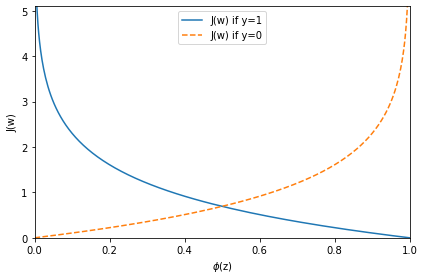

In [98]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

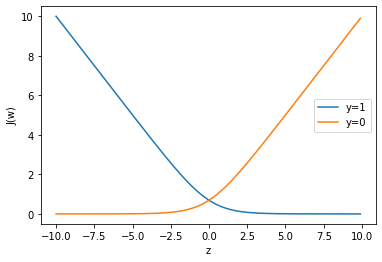

In [103]:
plt.plot(z, c1, label='y=1')
plt.plot(z, c0, label='y=0')
# plt.plot(z, phi_z, label='sigmoid')
plt.xlabel('z')
plt.ylabel('J(w)')
plt.legend()

In [104]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)  # logistic sigmoid
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


(212, 215) (212, 215) (212, 215)


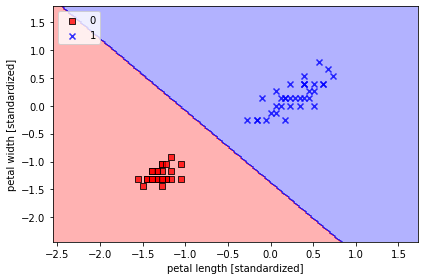

In [105]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

In [15]:
np.clip(np.arange(10), 1, 5)

array([1, 1, 2, 3, 4, 5, 5, 5, 5, 5])

(258, 265) (258, 265) (258, 265)


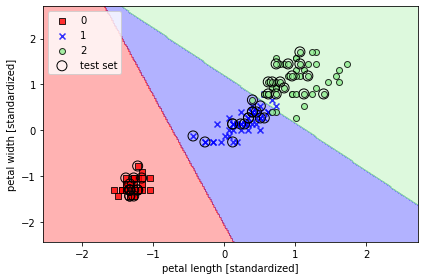

In [106]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)　　#　C：値が小さくなるほど正則化の強さが増す 

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

#### 制限付きメモリBFGS（L-BFGSまたはLM-BFGS）は、限られた量のコンピュータメモリを使用してBroyden–Fletcher–Goldfarb–Shannoアルゴリズム（BFGS）を近似する準ニュートン法のファミリーの最適化アルゴリズム

#### 機械学習におけるパラメーター推定の一般的なアルゴリズム：目標は最小化

####  引用：https://en.wikipedia.org/wiki/Limited-memory_BFGS
#### github:https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/linear_model/_logistic.py


In [17]:
lr.predict_proba(X_test_std[:3, :])　　 # 各クラスの予測確率が格納

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [108]:
lr.intercept_, lr.coef_

(array([ -6.78699126,  -0.75768971, -10.17153645]),
 array([[-5.83037767, -4.98273149],
        [ 2.4099601 , -2.07349026],
        [10.58756396,  5.80486652]]))

In [18]:
np.bincount(y_combined[105:150])

array([15, 15, 15])

In [19]:
lr.predict(X_test_std[0,:].reshape(1,2))

array([2])

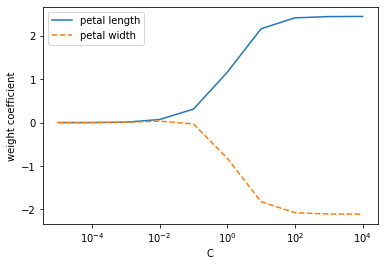

In [113]:

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,  ## 正則化項Cに-5~5乗した値をループ
                            solver='lbfgs',
                            multi_class='ovr')
    lr.fit(X_train_std[:,0:], y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
#     print(lr.coef_)
#     print(lr.intercept_)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

### 逆正則化パラメータ
$$C = \frac{1}{\lambda}$$

### 逆正則化パラメータをへらすことで正則化の強さを高める

#### https://homes.cs.washington.edu/~pedrod/bvd.pdf

In [23]:
X_train_std.shape

(105, 2)

In [24]:
np.dot(X_test_std[:3,:], np.array([[-4.55084948e-04, -4.37679584e-04],
 [9.45923160e-05, 5.76506032e-05],
 [3.60492645e-04, 3.80028991e-04]]).T) # +\
# np.array([-0.69314731, -0.69314718, -0.69314727])

array([[-0.00104159,  0.00016832,  0.00087327],
       [ 0.00098776, -0.00017049, -0.00081727],
       [ 0.00112128, -0.00019387, -0.00092741]])

In [25]:
lr.predict_proba(X_test_std[:3,:])

array([[8.85053757e-16, 1.42748255e-01, 8.57251745e-01],
       [8.35277660e-01, 1.64722340e-01, 4.14836316e-17],
       [8.49585903e-01, 1.50414097e-01, 1.49150167e-18]])

In [26]:
np.dot(X_test_std[:3, :], lr.coef_.T)

array([[-22.00758453,  -0.85167267,  22.98510489],
       [ 21.51007461,  -0.64508479, -24.17645323],
       [ 24.43776507,  -0.77760009, -27.51883802]])

In [27]:
lr.coef_

array([[-10.85522339,  -8.47746807],
       [  2.4424029 ,  -2.10629411],
       [ 14.65216005,   6.7948242 ]])

In [28]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

## サポートベクトルマシン（SVM)

#### ・パーセプトロンの拡張
#### ・最適化の目的はマージンの最大化（誤分類率の最小化をこれまでは行ってきた）
#### ・マージンは超平面と超平面に最も近い訓練データの間の距離として定義される
#### ・興味の対象はサポートベクトル

(258, 265) (258, 265) (258, 265)


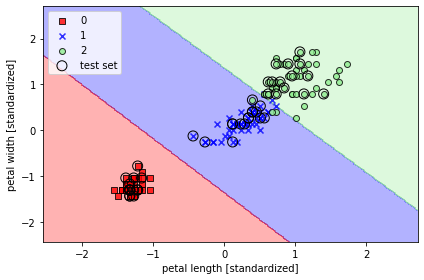

In [117]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()

#### 線形分離可能（Linearly separable）とは、幾何学においてふたつの集合が二次元平面上にあるとき、それらの集合を一本の直線で分離できることをいう。これを一般化して、n 次元空間上のふたつの集合を n − 1 次元の超平面で分離できることも線形分離可能と呼ぶ。逆に、分離できない場合を線形分離不可能と呼ぶ。


#### 線形分離可能でないとき、ソフトマージン分類

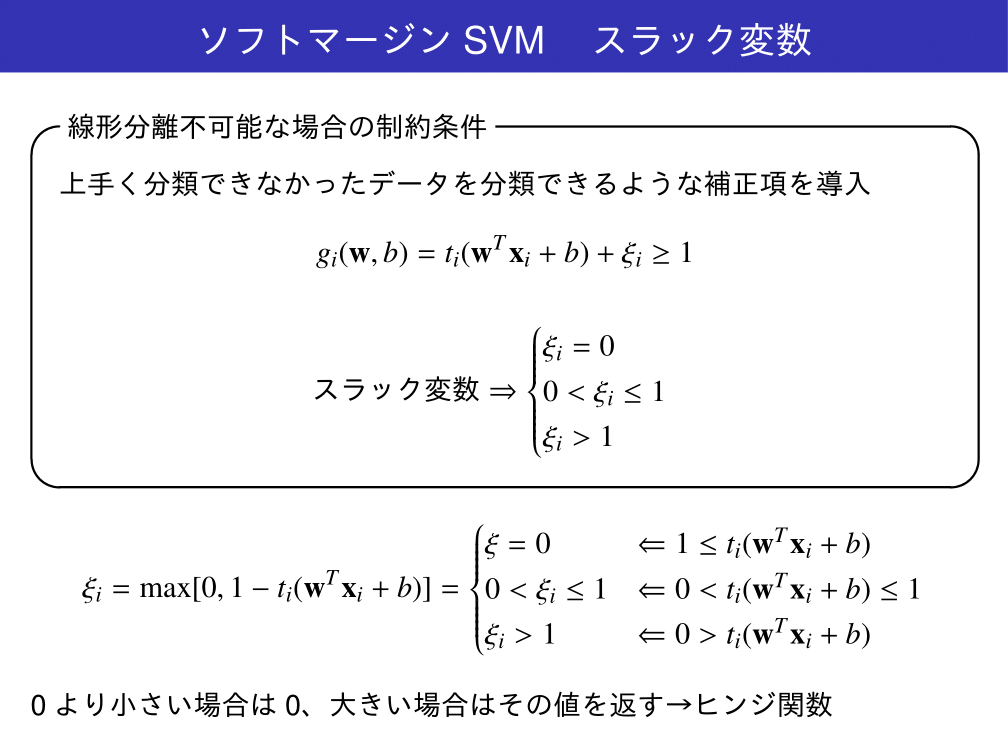

In [116]:
from IPython.display import Image
Image(filename='スラック変数.png', width=600)

#### ソフトマージン引用：https://qiita.com/ironball/items/6acb3546312f4c65ec54

$$\frac{1}{2}||w|| + C(\sum_{i}\xi^i)$$

#### を最小化したい

#### 超平面からの距離が１より大きいときスラック変数は０
#### 決定境界と正負の超平面の間のとき、０ < スラック変数　<　1
#### 決定境界を飛び越えているとき、1　<　スラック変数

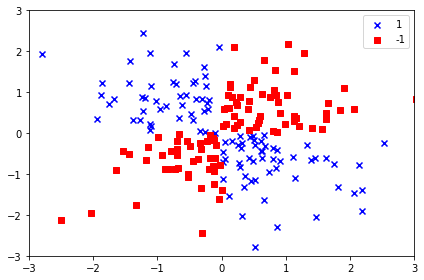

In [120]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12

#### 引用：https://punhundon-lifeshift.com/kernel_method

#### 引用：https://qiita.com/kilometer/items/66e6116cc661019ead59

#### 引用:https://www.ism.ac.jp/~fukumizu/OsakaU2014/OsakaU_1intro.pdf

#### カーネル法とは、上記のような2次元のプロットを3次元空間に写像したあと、真っ直ぐな線を引き、もとの空間に戻す方法

#### 最もよく使われているカーネルの一つとして、ガウスカーネル（RBF)がある

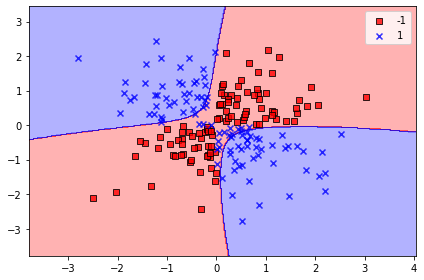

In [33]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                     classifier=svm)

plt.legend()
plt.tight_layout()

(362, 392) (362, 392) (362, 392)


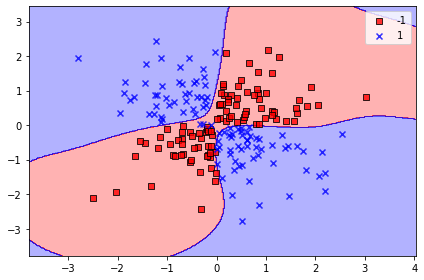

In [121]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.5, C=10)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                     classifier=svm)

plt.legend()
plt.tight_layout()

#### パラメータgammaについて

##### ガウスカーネルの「カットオフ（限界値）」パラメータであると解釈されている。
##### gamma　ー>　大　：　訓練データの影響力が大きくなり、到達範囲が広くなる

(258, 265) (258, 265) (258, 265)


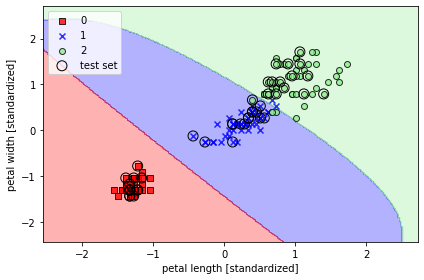

In [122]:
svm = SVC(kernel='rbf', gamma = 0.2, C=1, random_state=1)  # gamma = 0.2
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=svm,
                     test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()

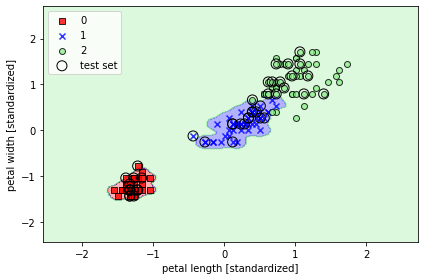

In [35]:
svm = SVC(kernel='rbf', gamma = 100, C=1, random_state=1) 
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=svm,
                     test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()

### 決定木

##### 意味解釈が容易

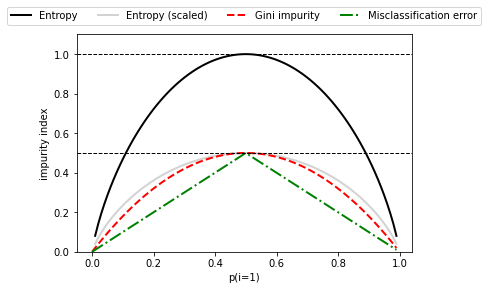

In [36]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1-p)

def error(p):
    return 1 - np.max([p, 1- p])

x = np.arange(0, 1 ,0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig, ax  = plt.subplots(1,1)

for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

(220, 395) (220, 395) (220, 395)


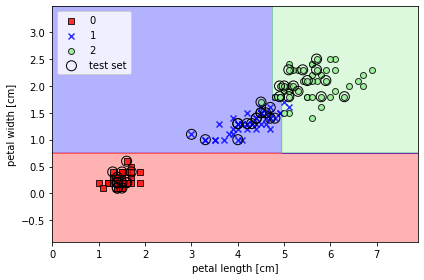

In [123]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                   max_depth=4,
                                   random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                     classifier=tree_model,
                     test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

In [38]:
X_combined.shape, y_combined.shape

((150, 2), (150,))

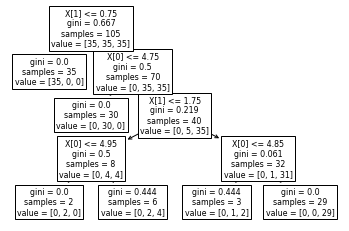

In [124]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.show()

#### ジニ不純度の大きい方での分割を優先
#### ジニ不純度が０になるまでノードが生成する

### ランダムフォレスト

#### &emsp;・決定木のアンサンブル
#### &emsp;・汎化性能が高く過学習に対して堅牢なモデル

#### ランダムフォレストのアルゴリズム
##### 1.サイズｎのランダムなブートストラップ標本を復元抽出する
##### 2.ブートストラップ標本から決定木を成長させる。各ノードで以下の操作を行う
#####  &emsp;2.1 d個の特徴量をランダムに非復元抽出
#####  &emsp;2.2 例えば情報利得を最大化することにより、目的関数に従って最適な分割となる特徴量を使ってノードを分割する
##### 3. １〜２をk回繰り返す
##### 4. 決定木ごとの予測をまとめ、多数決に基づいてクラスラベルを割り当てる。


#### ランダムフォレストの特徴
##### &emsp;・ハイパーパラメータの適切な値を設定
##### &emsp;・アンサンブルモデルの個々の決定木のノイズにかなり強いため通常剪定の必要がない
##### &emsp;・配慮が必要なパラメータとして決定木の個数、葉のノード数や分割数




#### Tips；標本サイズについて
##### &ensp;・ブートストラップの標本サイズを小さくすると、決定木間の相違性が高くなる
##### &emsp;-> 特定の訓練データがブートストラップ標本に含まれている確率が低くなるから
##### &emsp;※ランダムフォレストの全体的な性能は低下する傾向になる
##### &ensp;・ブートストラップの標本サイズを大きくすると、過学習の可能性が高まる
##### &emsp;-> 個々の決定木同士の類似性が高くなるため、訓練データにより適合しやすい

(220, 395) (220, 395) (220, 395)


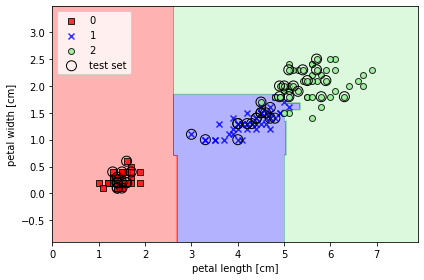

In [125]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, # 25個の決定木
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()

### k最近傍法（KNN)
##### &ensp;代表的な怠惰学習。訓練データセットを暗記するため

#### KNNアルゴリズム
##### &ensp;１． ｋの値と距離指標を選択する
##### &ensp;２． 分類したいデータ店からkこの最近傍のデータ点を見つけ出す
##### &ensp;３． 多数決によりクラスラベルを割り当てる

##### 選択された距離指標に基づき、訓練データの中から分類したいデータ点に最も近い（最も類似する）k個の訓練データを見つける


#### sklearn;https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric


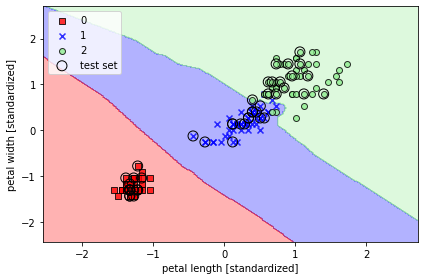

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2,  # ユークリッド距離（ｐ＝１のとき、マンハッタン距離）
                           metric='minkowski')　　# ユークリッド距離とマンハッタン距離を一般化
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()